## Read data from Steven Akin's OpenCTD instruments

Steven built two OpenCTDs in the summer of 2021.  He came to WHOI to test them against Seabird 37 CTDs (a trusted oceanographic research quality CTD).  This is to read and plot some of the data.

First read in the SBE37 data from the cal bath.  The fields are as follows:
```
# name 0 = timeJ: Julian Days
# name 1 = tv290C: Temperature [ITS-90, deg C]
# name 2 = cond0S/m: Conductivity [S/m]
# name 3 = sal00: Salinity, Practical [PSU]
# name 4 = prdM: Pressure, Strain Gauge [db]
# name 5 = flag:  0.000e+00
# span 0 = 225.725706, 225.877905                 
# span 1 =     0.1177,    30.2064                 
# span 2 =  -0.000194,   0.013056                 
# span 3 =     0.0000,     0.0608                 
# span 4 =     -0.120,      0.467                 
# span 5 = 0.0000e+00, 0.0000e+00                 
# interval = seconds: 10
# start_time = Aug 13 2021 17:25:01 [Instrument's time stamp, first data scan]
```

Lines 1-283 of the CNV file are header lines.

The file is here:
"..\data\raw\cal_bath\SBE37SM-RS232_03715360_2021_08_13.cnv"


In [1]:
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt


In [2]:
# fname=r'C:\Users\jtomf\Desktop\access_to_the_sea\info\for_students\Steven_Akin\data\cal_bath\SBE37SM-RS232_03715360_2021_08_13.cnv'
fname=r'..\data\raw\cal_bath\SBE37SM-RS232_03715360_2021_08_13.cnv'

In [3]:

data  = np.genfromtxt(fname, skip_header=285)

In [4]:
np.shape(data)


(1314, 6)

In [5]:
t_JD = data[:,0]
tv290C =  data[:,1]
cond = data[:,2]
sal = data[:,3]
press = data[:,4]

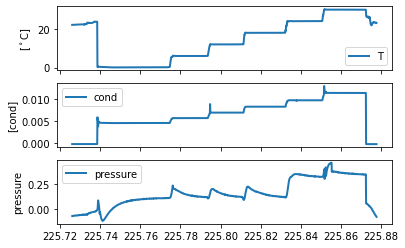

In [6]:
fig, axs = plt.subplots(3, 1, sharex=True)
axs[0].plot(t_JD, tv290C, lw=2)
axs[0].set(ylabel='[$^\circ$C]')
axs[0].legend(['T'])
axs[1].plot(t_JD, cond, lw=2)
axs[1].set(ylabel='[cond]')
axs[1].legend(['cond'])
axs[2].plot(t_JD, press, lw=2)
axs[2].set(ylabel='pressure')
axs[2].legend(['pressure'])


1st 2 lines of OpenCTD data file:
Date, Time,Pressure,Temp A,Temp B,Temp C,Conductivity
08/13/2021,12:32:04,1007.30,23.19,23.44,23.19,

In [9]:
fname=r'..\data\raw\cal_bath\LOG001.csv'
data  = np.genfromtxt(fname, skip_header=1,delimiter=",")

In [33]:
np.shape(data)

(12873,)

In [41]:
from datetime import datetime

str2date = lambda x: datetime.strptime(x, '%d/%m/%Y')
data = np.genfromtxt(fname, skip_header=1, delimiter=',', usecols=(0,), dtype=object, names=True, converters = {0: str2date}, encoding='utf-8')

In [39]:
print(data[0:10])


[None None None None None None None None None None]
